# Monthly Milk Production

In [1]:
import pandas as pd
from matplotlib import dates

In [4]:
df = pd.read_csv('Data/monthly_milk_production.csv', index_col='Date', parse_dates=True, encoding='utf8')

In [6]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [10]:
df.dtypes

Production    int64
dtype: object

<AxesSubplot:xlabel='Date'>

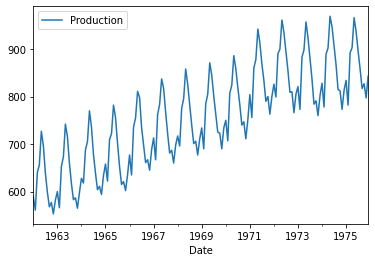

In [11]:
df.plot()

In [14]:
df['Month'] = df.index.month
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [16]:
df['Month'] = df.index.strftime('%B')
df.head()

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


<AxesSubplot:title={'center':'Production'}, xlabel='[Month]'>

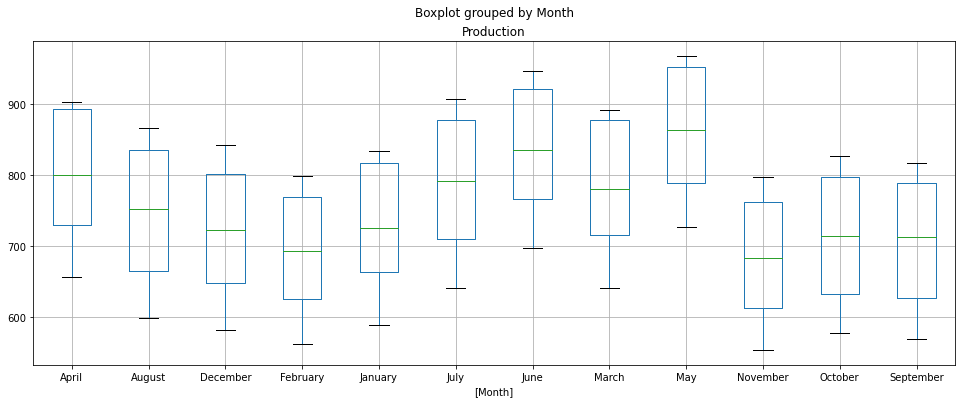

In [17]:
df.boxplot(by='Month', figsize=(16,6))

# Manufacture Shipments for All Manufacturing

In [18]:
import pandas as pd
from matplotlib import dates

In [21]:
df = pd.read_csv('Data/UMTMVS.csv', index_col='DATE', parse_dates=True)
print("Shape of the Data Frame: ", df.shape)
df.head()

Shape of the Data Frame:  (325, 1)


,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


<AxesSubplot:xlabel='DATE'>

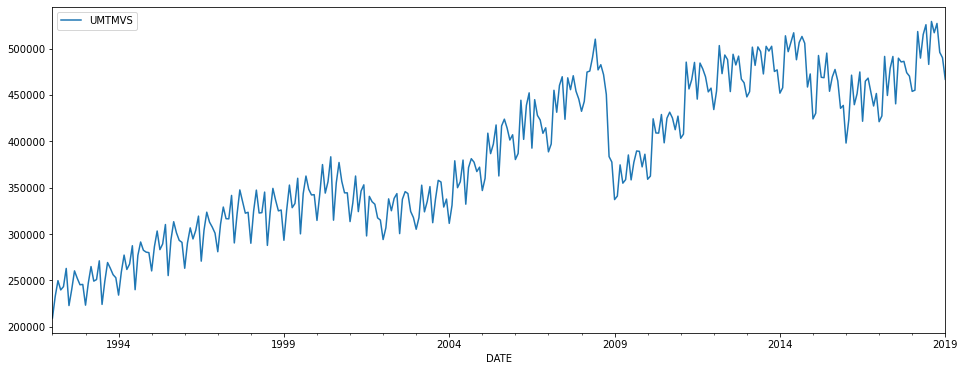

In [23]:
df.plot(figsize=(16,6))

Percent of increase from Jan 2009 to Jan 2019

In [25]:
df['UMTMVS']['01-01-2009':'01-01-2019']

DATE
2009-01-01    337101.0
2009-02-01    340896.0
2009-03-01    374521.0
2009-04-01    354790.0
2009-05-01    358584.0
                ...   
2018-09-01    516992.0
2018-10-01    527031.0
2018-11-01    495901.0
2018-12-01    490076.0
2019-01-01    466791.0
Name: UMTMVS, Length: 121, dtype: float64

<AxesSubplot:xlabel='DATE'>

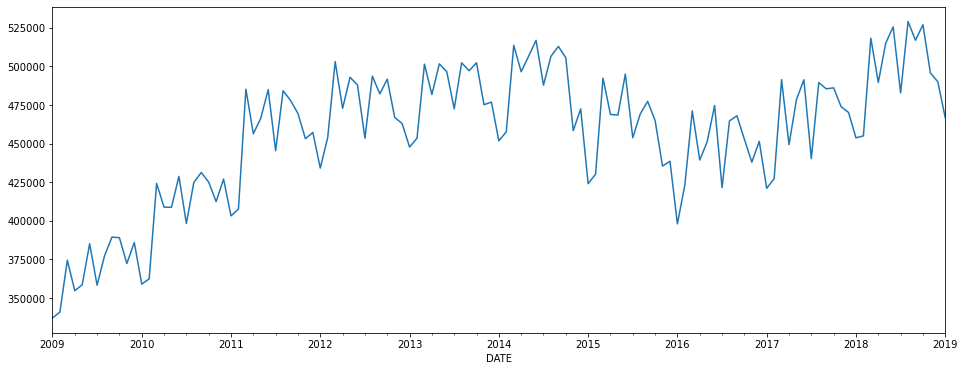

In [28]:
df['UMTMVS']['01-01-2009':'01-01-2019'].plot(figsize=(16,6))

In [30]:
(df['UMTMVS']['01-01-2019'] - df['UMTMVS']['01-01-2009']) /  df['UMTMVS']['01-01-2009'] * 100

38.47214929650164

Percent of decrease from January 2008 to January 2009

In [31]:
(df['UMTMVS']['01-01-2009'] - df['UMTMVS']['01-01-2008']) / df['UMTMVS']['01-01-2008'] * 100

-22.022775481313047

Month with the least value after 2005

In [33]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

6 months of the highest value

In [37]:
df.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


millions of dollars in value was lost in 2008

In [38]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

<AxesSubplot:xlabel='DATE'>

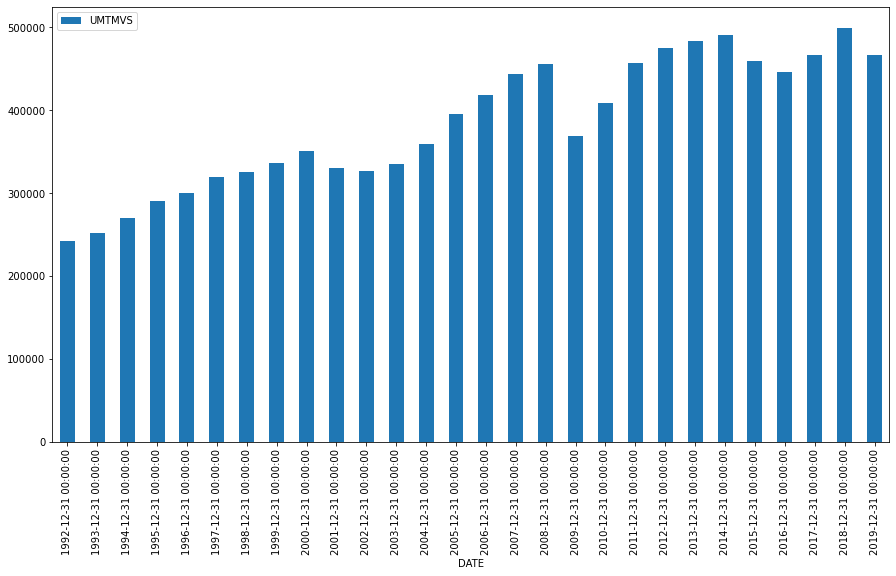

In [39]:
df.resample('Y').mean().plot.bar(figsize=(15,8))

the year that had the biggest increase in mean value from the previous year's mean value

In [40]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [44]:
change = yearly_data - yearly_data_shift 
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


In [45]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

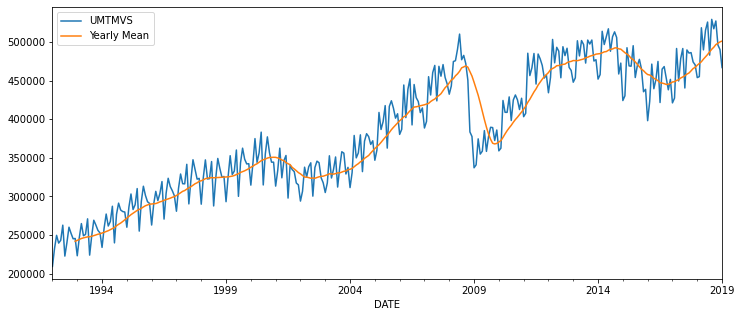

In [46]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);